In [5]:
import os

os.chdir('/home/ubuntu/nndlproject/')

from src.dataset import * # import ModelNetDataset class
from torch.utils.data import DataLoader
import pandas as pd

metadata_path = '/home/ubuntu/nndlproject/data/modelnet10/metadata.csv'

metadata = pd.read_csv(metadata_path,index_col=0)
metadata.head()

,filename,split,path,label,label_str
0,desk_0244.ply,test,/home/ubuntu/nndlproject/data/modelnet10/ply/d...,0,desk
1,desk_0208.ply,test,/home/ubuntu/nndlproject/data/modelnet10/ply/d...,0,desk
2,desk_0256.ply,test,/home/ubuntu/nndlproject/data/modelnet10/ply/d...,0,desk
3,desk_0260.ply,test,/home/ubuntu/nndlproject/data/modelnet10/ply/d...,0,desk
4,desk_0219.ply,test,/home/ubuntu/nndlproject/data/modelnet10/ply/d...,0,desk


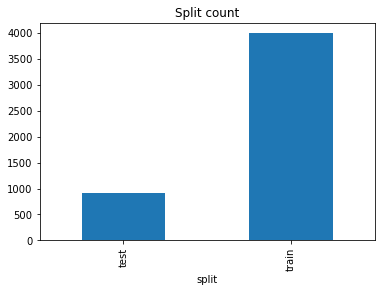

In [11]:
metadata.groupby('split').count()['filename'].plot.bar(title='Split count');

`ModelNetDataset` is a subclass of the PyTorch `DataSet` class, which is designed to work in pair with the `DataLoader` object. The `DataLoader` accepts, among the other parameters, a batch size, a shuffle option and a `num_workers` for multi processing, and returns the tensors with the added batch dimension as the first axis.

The `ModelNetDataset` class requires as an argument a metadata `.csv` file, that contains the id of each sample file, its path, its label and its split set (test or train). It also requires $N$, the resolution of the $N\times N \times N$ grid that will be used for voxelization.

In [12]:
dataset = ModelNetDataset(metadata_path=metadata_path,N=30,split='train')
loader = DataLoader(dataset,10,shuffle=True,num_workers=8)

The `DataLoader` can be casted as an iterable that yields batches.

In [13]:
voxel_batch,rot_batch,label_batch=next(iter(loader))

In [14]:
print(voxel_batch.shape)
print(rot_batch.shape)
print(label_batch.shape)

torch.Size([10, 1, 30, 30, 30])
torch.Size([10, 3])
torch.Size([10])


tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 